<a href="https://colab.research.google.com/github/elkingelvez/workshop_nnrw/blob/main/presentation_nnrw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

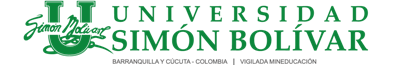

# **REDES NEURONALES CON PESOS ALEATORIOS: EL MODELO SUPERVISADO**

#  Elkin Gelvez Almeida
*   Universidad Simón Bolívar - Cúcuta
*   Facultad de Ciencias Básicas y Biomédicas
*   e-mail: elkin.gelvez@unisimon.edu.co



---



# Introducción





*   Gigabytes, terabytes y petabytes de datos.
*   Millones de suscripciones o busquedas diarias.
*   Tiempos de procesamientos elevados.
*   Capacidad de memoria insuficiente que requieren arquitecturas computacionales costosas.



---



# Random Vector Functional Link Network

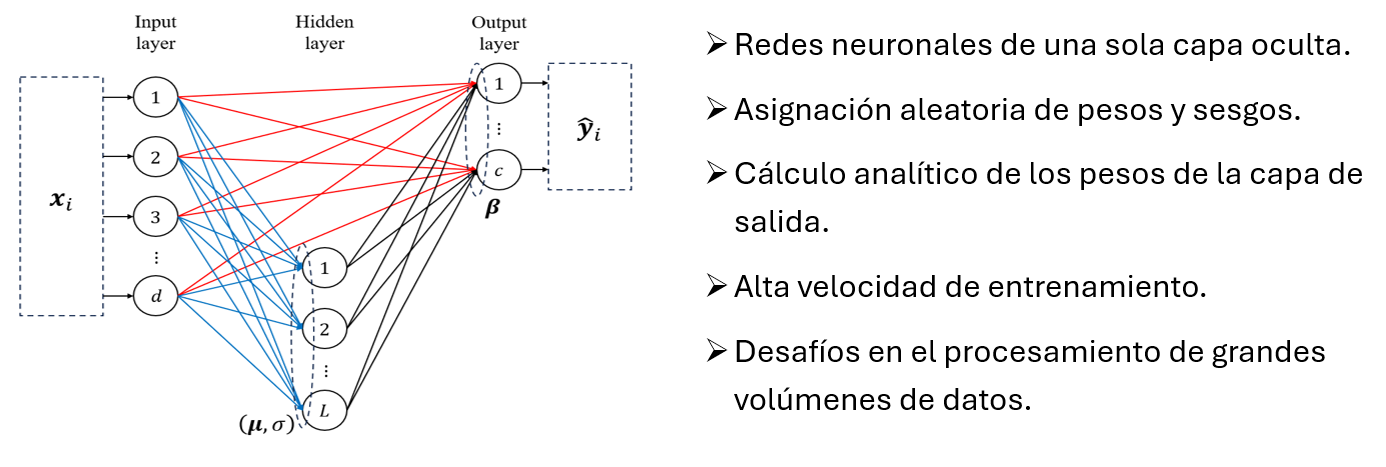

**Figura.** Modelo estándar de una red neuronal random vector functional link (RVFL)

---

Sea $\mathbf{Ζ}$ un conjunto de entrenamiento $\{ (\mathbf{x}_i, \mathbf{y}_i) | \mathbf{x}_i \in \mathbb{R}^d, \mathbf{y}_i \in \mathbb{R}^c \}$ con $i = 1, \ldots, N$, $\mathbf{θ}: \mathbb{R}^n \rightarrow \mathbb{R}^m$ una función de activación, y $L$ número de neuronas en la capa oculta con $L < N$, el algoritmo de entrenamiento de una red RVFL está dad por:
\begin{equation}
  f(\mathbf{x}_i) = \sum_{k=1}^{d} \boldsymbol{\beta}_k \mathbf{x}_{ik} + \sum_{k=1}^{L} \boldsymbol{\beta}_k \boldsymbol{\theta}(\boldsymbol{\mu}_k \cdot \mathbf{x}_i + \sigma_k),
\end{equation}
donde $\boldsymbol{\mu}_k$ y $\sigma_k$ son el $k$-ésimo peso y sesgo de la capa oculta, respectivamente, $\boldsymbol{\beta}_k$ es el $k$-ésimo peso de la capa de salida, $\boldsymbol{\mu}_k \cdot \mathbf{x}_i$ representa el producto interno de $\boldsymbol{\mu}_k$ y $\mathbf{x}_i$. Entonces, los pesos $\boldsymbol{\beta}_k$ son calculados analíticamente usando
\begin{equation}
    \boldsymbol{\beta} = \mathbf{H}^{\dagger} \mathbf{Y},
\end{equation}
donde $\mathbf{H}^{\dagger}$ es la inversa generalizada de Moore-Penrose de la matriz $\mathbf{H}$.



---

*   $\mathbf{H} = [\mathbf{DX}]$ es la concatenación de la salida de la capa oculta y las características originales de los datos.

*   $\mathbf{D}$ es la matriz de salida de la capa oculta y se presenta de la siguiente manera:
\begin{equation}
    \boldsymbol{D} =
    \begin{bmatrix}
        \mathbf{\theta}(\mathbf{\mu}_1 \mathbf{x}_1 + \sigma_1)    &   \cdots  &   \mathbf{\theta}(\mathbf{\mu}_L \mathbf{x}_1 + \sigma_L)\\
        \vdots  &   \ddots  &   \vdots\\
        \mathbf{\theta}(\mathbf{\mu}_1 \mathbf{x}_N + \sigma_1)    &   \cdots  &   \mathbf{\theta}(\mathbf{\mu}_L \mathbf{x}_N + \sigma_L)
    \end{bmatrix}_{N \times L}
\end{equation}

*   $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N]^T$ es el conjunto de datos de entrenamiento.

*   $\mathbf{Y} = [\mathbf{y}_1, \mathbf{y}_2, \ldots, \mathbf{y}_N]^T$ es la matriz objetivo.





---



# Ejemplo práctico usando mnist dataset

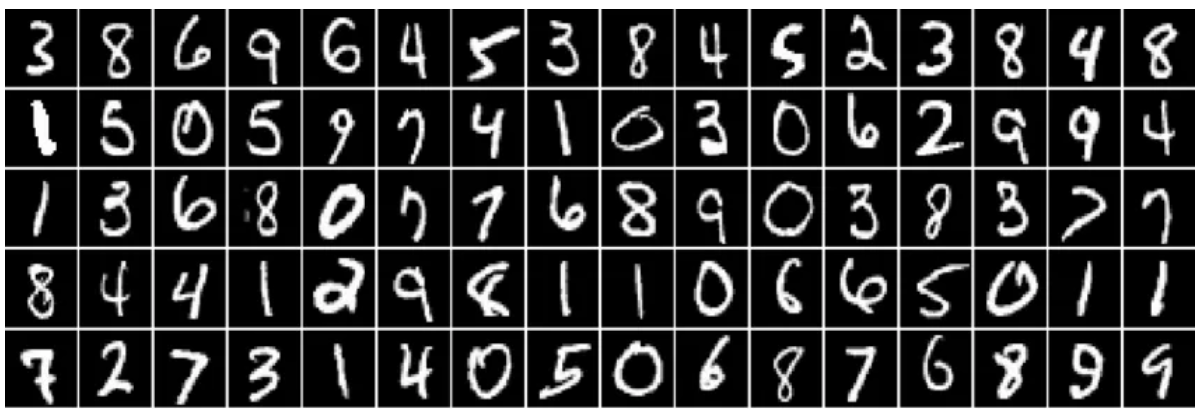

**Figura.** Ejemplos de mnist dataset



---



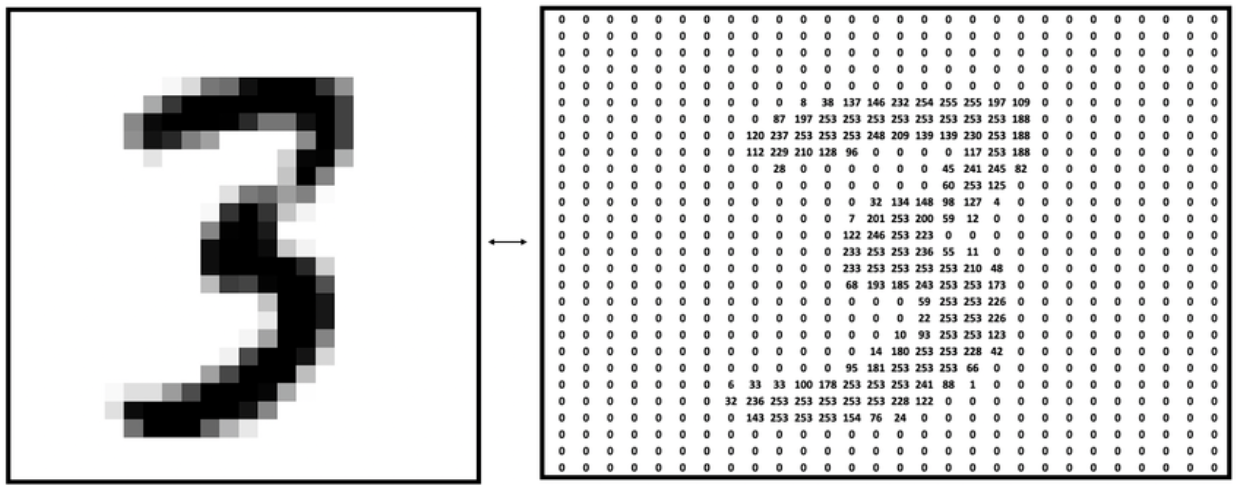

**Figura.** Representación del valor tres en mnist dataset y su matriz equivalente.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import time

In [ ]:
# 1. Cargar los datos (usaremos MNIST como ejemplo)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalizar los datos de entrada entre 0 y 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Ver los primeros 5 datos de X_train y y_train
print("Primeros 5 datos de X_train:\n", X_train[:5])
print("Primeros 5 datos de y_train:\n", y_train.values[:5])

In [ ]:
# 2. Convertir las etiquetas en codificación one-hot
num_classes = len(np.unique(y))
y_train_onehot = np.eye(num_classes)[y_train]
y_test_onehot = np.eye(num_classes)[y_test]

# Ver los primeros 5 datos de y_train
print("Primeros 5 datos de y_train:\n", y_train_onehot[:5])

In [ ]:
# Tamaño de los datos de entrenamiento y prueba
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train_onehot.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test_onehot.shape)

In [ ]:
# 3. Implementación de la clase ELM
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de los pesos de la capa oculta aleatoriamente
        self.hidden_weights = np.random.randn(input_size, hidden_size)
        self.output_weights = None
        self.hidden_bias = np.random.randn(hidden_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X, y):
        # Propagación hacia adelante en la capa oculta
        H = self.sigmoid(X @ self.hidden_weights + self.hidden_bias)

        # Calcular los pesos de salida usando la pseudoinversa
        self.output_weights = np.linalg.pinv(H) @ y

    def predict(self, X):
        # Propagación hacia adelante
        H = self.sigmoid(X @ self.hidden_weights + self.hidden_bias)

        # Predicciones de la capa de salida
        output = H @ self.output_weights
        return np.argmax(output, axis=1)  # Devuelve el índice de la clase con mayor valor

In [ ]:
# 4. Configuración de los parámetros de la red
input_size = X_train.shape[1]
hidden_size = 100  # Puedes ajustar el número de neuronas ocultas
output_size = num_classes

# Crear el modelo ELM
elm = ELM(input_size, hidden_size, output_size)

# Entrenar la red
start_time = time.time()
elm.train(X_train, y_train_onehot)
end_time = time.time()

# Hacer predicciones en el conjunto de prueba
y_pred = elm.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo ELM:", accuracy)
print("Tiempo de predicción: {:.4f} segundos".format(end_time - start_time))



---



# Inversa generalizada de Moore-Penrose

Para $\mathbf{A} \in \mathbb{R}^{m \times n}$, existe una matriz única $\mathbf{A}^† \in \mathbb{R}^{n \times m}$ que satisface las siguientes condiciones, conocidas como las condiciones de Penrose:
\begin{equation}
    % \left\{
    \begin{aligned}
        & (1) \quad \mathbf{AA}^{\dagger}\mathbf{A} = \mathbf{A} \\
        & (2) \quad \mathbf{A}^{\dagger}\mathbf{AA}^{\dagger} = \mathbf{A}^{\dagger} \\
        & (3) \quad \mathbf{A}^{\dagger}\mathbf{A} = (\mathbf{A}^{\dagger}\mathbf{A})^T \\
        & (4) \quad \mathbf{AA}^{\dagger} = (\mathbf{AA}^{\dagger})^T
    \end{aligned}
    % \right.
\end{equation}

En el contexto de las redes neuronales, la inversa generaliza de Moore-Penrose está definida de la siguiente forma:
\begin{equation}
    % {\footnotesize
    \mathbf{A}^{\dagger} = \left\{
    \begin{aligned}
        \left(\mathbf{A}^T \mathbf{A} \right)^{-1} \mathbf{A}^T, \quad n \leq m \\
        \mathbf{A}^T \left(\mathbf{A} \mathbf{A}^T \right)^{-1},  \quad n > m
    \end{aligned}
    \right.
    % }
\end{equation}



---



# Algoritmo de Strassen

Sea $A \in \mathbb{R}^{n × n}$ una matriz particionada por bloques
\begin{equation}
    \mathbf{A} =
    \begin{bmatrix}
        \mathbf{A}_{11} & \mathbf{A}_{12} \\
        \mathbf{A}_{21} & \mathbf{A}_{22}
    \end{bmatrix}, \quad
    \mathbf{A}_{11} \in \mathbb{R}^{k \times k},
\end{equation}

donde $\mathbf{A}$ y $\mathbf{A}_{11}$ son matrices no singulares, y $k$ representa el cociente entero de $n/2$. Su inversa se expresa como:
\begin{equation}
    \mathbf{A}^{-1} =
    \begin{bmatrix}
        \mathbf{X}_{11} & \mathbf{X}_{12} \\
        \mathbf{X}_{21} & \mathbf{X}_{22}
    \end{bmatrix}, \quad
    \mathbf{X}_{11} \in \mathbb{R}^{k \times k}.
\end{equation}



---



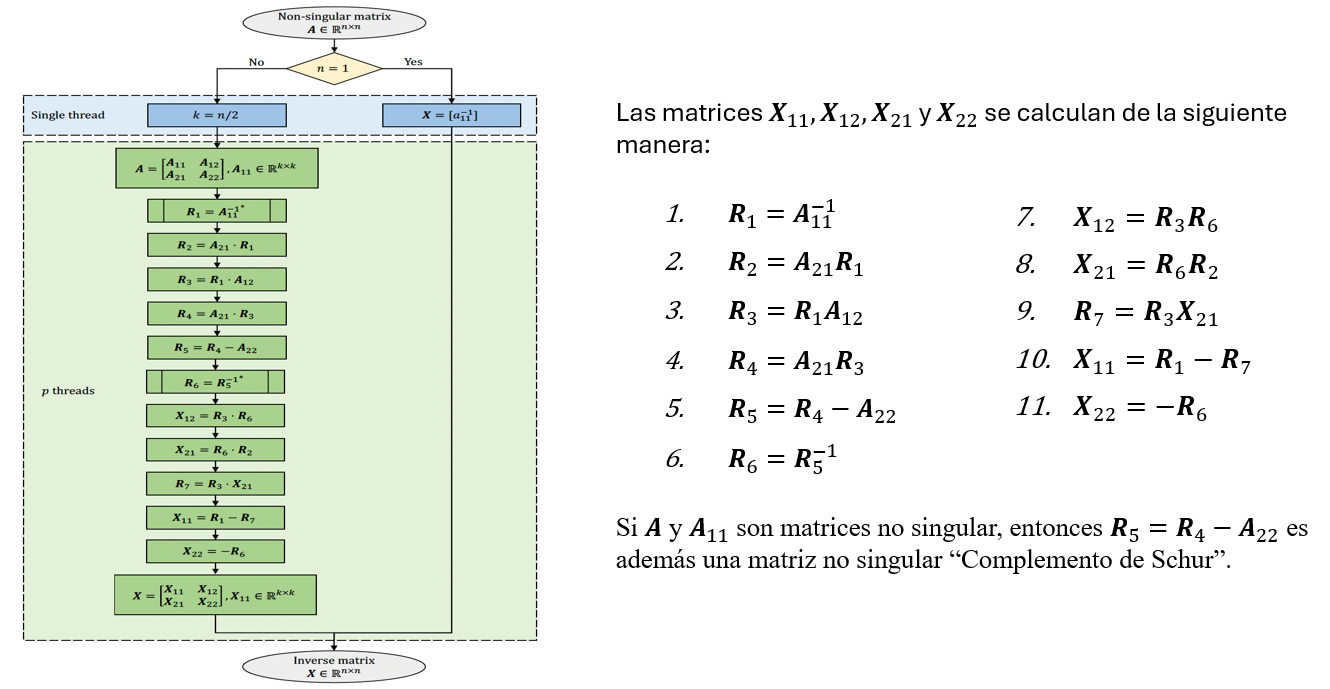

**Figura.** Algoritmo de Strassen para calcular la inversa de una matriz nosingular.



---



In [ ]:
# Paso 1: Crear una matriz no singular de dimensión 7x7 con números enteros
np.random.seed(42)  # Para reproducibilidad
A = np.random.randint(1, 10, (7, 7))  # Matriz de enteros entre 1 y 9

# Asegurarse de que la matriz sea no singular (invertible)
while np.linalg.det(A) == 0:
    A = np.random.randint(1, 10, (7, 7))

print("Matriz A:\n", A)

In [ ]:
# Paso 2: Particionar la matriz A en bloques
n = A.shape[0]
k = n // 2  # Cociente entero de n/2
A_11 = A[:k, :k]      # Bloque superior izquierdo
A_12 = A[:k, k:]      # Bloque superior derecho
A_21 = A[k:, :k]      # Bloque inferior izquierdo
A_22 = A[k:, k:]      # Bloque inferior derecho

print("Matriz A_11:\n", A_11)
print("Matriz A_12:\n", A_12)
print("Matriz A_21:\n", A_21)
print("Matriz A_22:\n", A_22)

In [ ]:
# Paso 3: Calcular la inversa usando los pasos descritos
R_1 = np.linalg.inv(A_11)  # R_1 = A_11^(-1)
R_2 = A_21 @ R_1           # R_2 = A_21 * R_1
R_3 = R_1 @ A_12           # R_3 = R_1 * A_12
R_4 = A_21 @ R_3           # R_4 = A_21 * R_3
R_5 = R_4 - A_22           # R_5 = R_4 - A_22
R_6 = np.linalg.inv(R_5)   # R_6 = R_5^(-1)
X_12 = R_3 @ R_6          # X_12 = R_3 * R_6
X_21 = R_6 @ R_2          # X_21 = R_6 * R_2
R_7 = R_3 @ X_21          # R_7 = R_3 * X_21
X_11 = R_1 - R_7          # X_11 = R_1 - R_7
X_22 = -R_6               # X_22 = -R_6

In [ ]:
# Paso 4: Construir la inversa de A
A_inv = np.block([[X_11, X_12],
                   [X_21, X_22]])

print("\nInversa de la matriz A:\n", A_inv)

In [ ]:
# Comprobar que A * A_inv es aproximadamente la matriz identidad
identity_check = np.allclose(A @ A_inv, np.eye(n))
print("\n¿A * A_inv es aproximadamente la matriz identidad?", identity_check)



---



In [ ]:
def invert_recursive(A):
    """Función para calcular la inversa de una matriz no singular de manera recursiva."""
    n = A.shape[0]

    # Caso base: si la matriz es 1x1, devuelve una matriz 1x1 en lugar de un escalar
    if n == 1:
        return np.array([[1 / A[0, 0]]])  # Resultado como matriz 1x1

    # Particionando la matriz
    k = n // 2
    A_11 = A[:k, :k]
    A_12 = A[:k, k:]
    A_21 = A[k:, :k]
    A_22 = A[k:, k:]

    # Inversión recursiva de A_11
    R_1 = invert_recursive(A_11)

    # Calcular R_2, R_3, R_4 y R_5
    R_2 = A_21 @ R_1
    R_3 = R_1 @ A_12
    R_4 = A_21 @ R_3
    R_5 = R_4 - A_22

    # Inversión de R_5
    R_6 = invert_recursive(R_5)

    # Cálculo de X_12, X_21, R_7, X_11, X_22
    X_12 = R_3 @ R_6
    X_21 = R_6 @ R_2
    R_7 = R_3 @ X_21
    X_11 = R_1 - R_7
    X_22 = -R_6

    # Construir la inversa de A
    A_inv = np.block([[X_11, X_12],
                      [X_21, X_22]])

    return A_inv

In [ ]:
# Calcular la inversa de A utilizando el algoritmo de Strassen
A_inv_strassen = invert_recursive(A)

# Verificar si A_inv y A_inv_strassen son iguales
if np.allclose(A_inv, A_inv_strassen, atol=1e-8):
    print("Las matrices A_inv y A_inv_strassen son aproximadamente iguales.")
else:
    print("Las matrices A_inv y A_inv_strassen NO son iguales.")



---



# Suma y resta de matrices

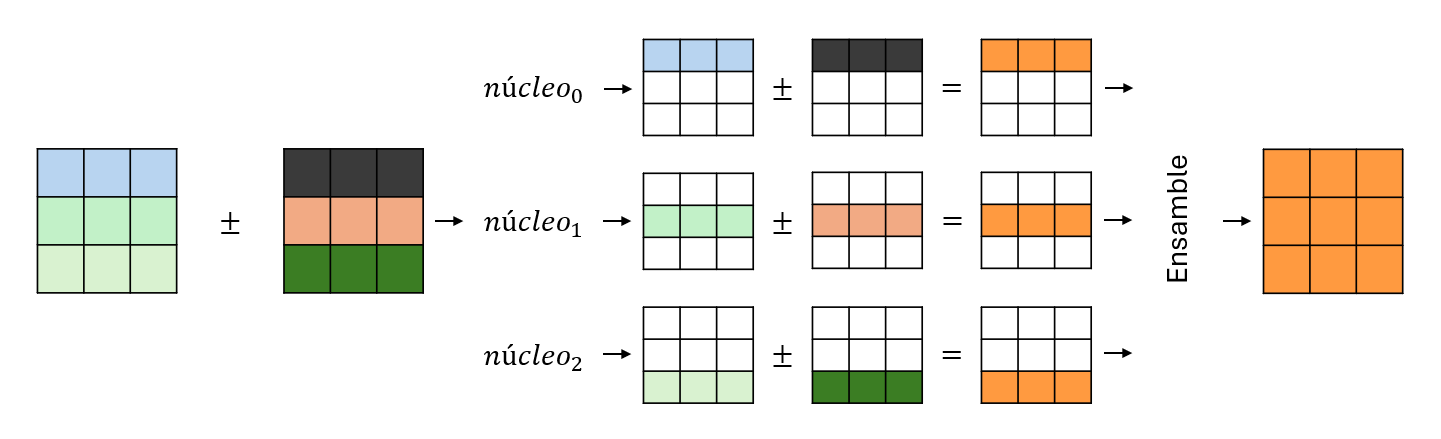



---



# Multiplicación de matrices

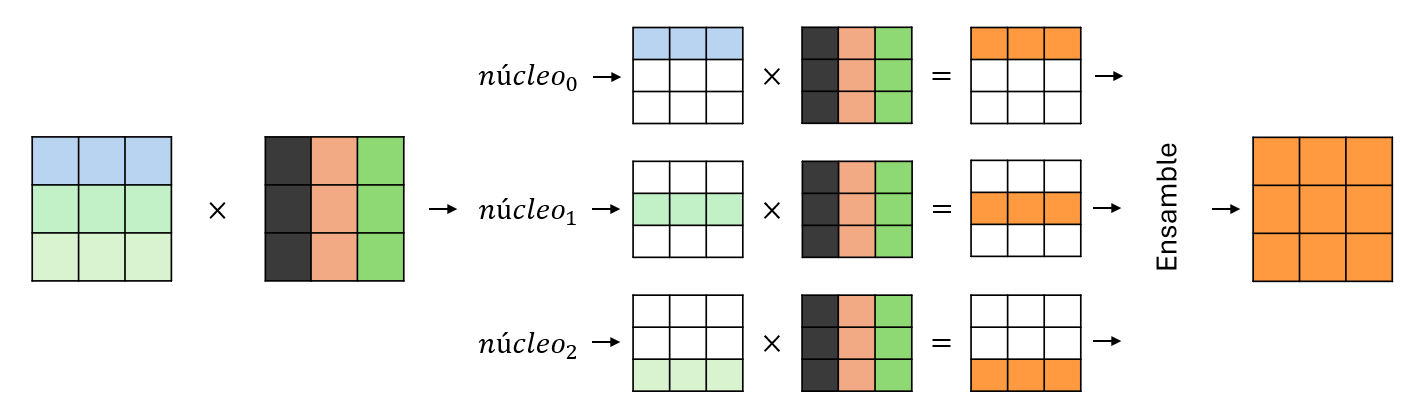



---



# Modelo para el cómputo paralelo de la inversa generalizada de Moore-Penrose

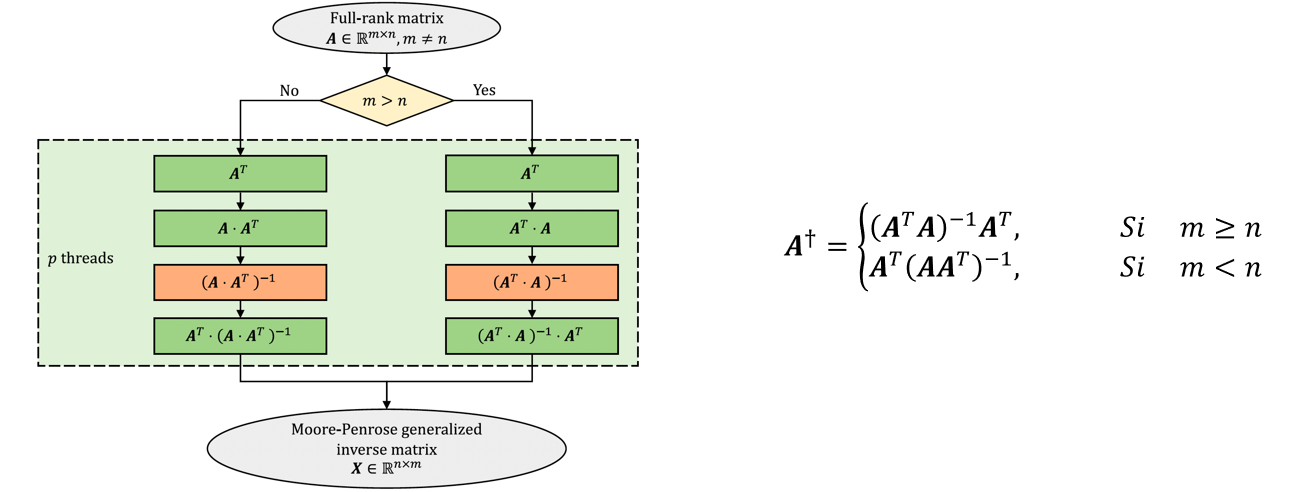

**Figura.** Cálculo de la inversa generalizada de Moore-Penrose de matrices rectangulares de rango completo



---



In [ ]:
def moore_penrose_pseudoinverse(A):
    """
    Calcula la pseudoinversa de Moore-Penrose de una matriz de rango completo A.
    """
    m, n = A.shape  # Obtener las dimensiones de A

    # Caso m >= n
    if m >= n:
        # Calcular (A^T A)^(-1) A^T
        A_pseudo_inv = invert_recursive(A.T @ A) @ A.T

    # Caso m < n
    else:
        # Calcular A^T (A A^T)^(-1)
        A_pseudo_inv = A.T @ invert_recursive(A @ A.T)

    return A_pseudo_inv

In [ ]:
# Crear una matriz de rango completo
np.random.seed(42)
A = np.random.randint(1, 10, (7, 5))  # Matriz de 7x5 (m > n) o ajusta a la forma deseada

# Calcular la pseudoinversa de Moore-Penrose
A_pseudo_inv = moore_penrose_pseudoinverse(A)

print("Matriz A:\n", A)
print("\nPseudoinversa de Moore-Penrose de A:\n", A_pseudo_inv)

# Comprobación: A @ A_pseudo_inv @ A ≈ A
check = np.allclose(A @ A_pseudo_inv @ A, A)
print("\n¿A @ A_pseudo_inv @ A es aproximadamente igual a A?", check)

# Cálculo secuencial de la inversa generalizada de Moore-Penrose

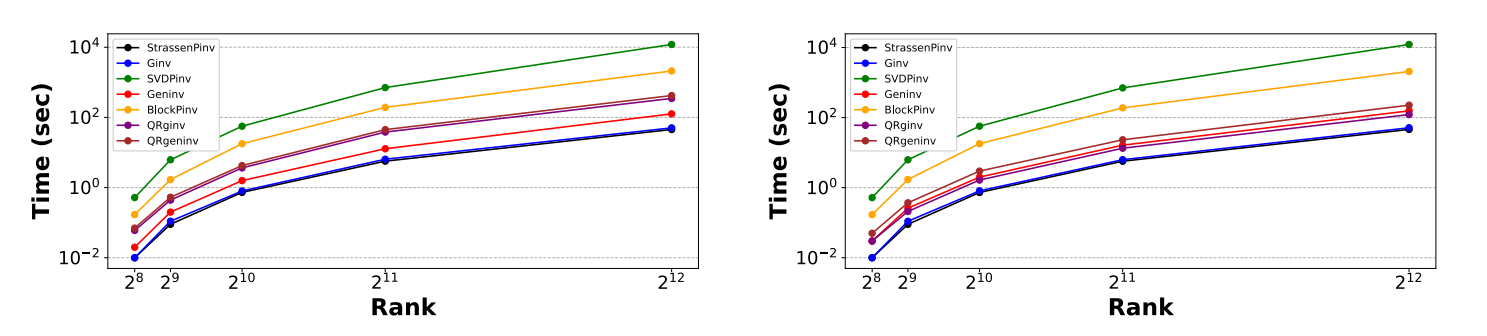

**Figura.** Tiempo de cómputo para obtener la inversa generalizada de Moore-Penrose de matrices de rango completo $𝑚 \times 𝑛$ con (a) $𝑚 = 2𝑛$ y $𝑅𝑎𝑛𝑘 = 𝑛$, y (b) $𝑛 = 2𝑚$ y $𝑅𝑎𝑛𝑘 = 𝑚$. Todos los métodos emplean matrices de rango $2^𝑘$, donde $𝑘 = 8, \ldots, 12$.



---



# Cálculo paralelo de la inversa generalizada de Moore-Penrose

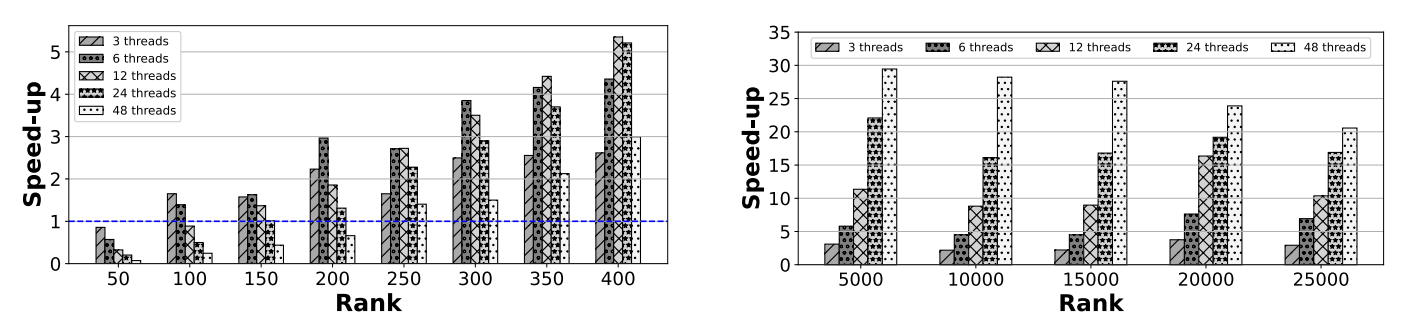

**Figura.** Aceleración en el cómputo de la inversa generalizada de Moore-Penrose para matrices de rango completo. El tamaño de las matrices es de $m × n$, donde $m = 2n$ y $Rank = n$.



---



# Resultados publicados en la revista IEEE Access [[Link](https://ieeexplore.ieee.org/abstract/document/10336814)]

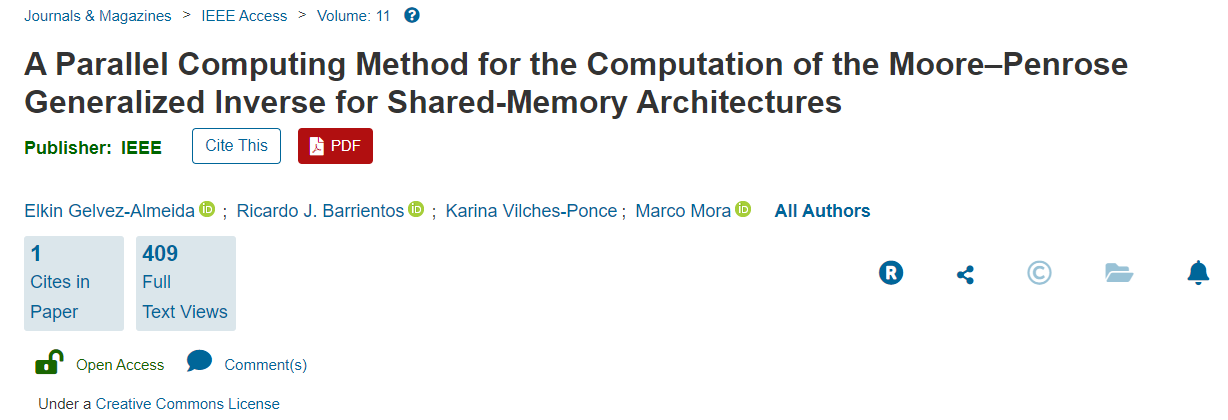



---



# Red neuronal usando el algoritmo de Strassen para computar la inversa generalizada de Moore-Penrose

1.   Se asignan aleatoriamente los pesos $\boldsymbol{μ}_k$ y sesgos $\boldsymbol{\sigma}_k$, donde $k = 1, \ldots, L$.
2.   Se computa la matriz $\mathbf{H} = [\mathbf{DX}]$, donde $\mathbf{H} \in \mathbb{R}^{N \times L+d}$, $\mathbf{D} \in \mathbb{R}^{N \times L}$ es la matriz de salida de la capa oculta y $\mathbf{X} \in \mathbb{R}^{N \times d}$ es el conjunto de datos de entrenamiento.
3.   Se define $\mathbf{A} = \mathbf{H}^T \mathbf{H}$ y $\mathbf{B} = \mathbf{H}^T \mathbf{Y}$, donde $\mathbf{Y} \in \mathbb{R}^{N \times c}$ es la matriz objetivo de los datos de entrenamiento.
4.   Se utiliza el algoritmo de Strassen para calcular $\mathbf{A}^{-1}$.
5.   Se calculan los pesos de salida $\boldsymbol{\beta} \in \mathbb{R}^{L+d \times c}$ 𝜷∈ℝ^(𝐿+𝑑×𝑐) usando

$$
\boldsymbol{\beta} = \mathbf{A}^{-1} \mathbf{B} = (\mathbf{H}^T \mathbf{H})^{-1} \mathbf{H}^T \mathbf{Y}.
$$






---



In [ ]:
# Implementación de la clase ELM
class ELM_strassen:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de los pesos de la capa oculta aleatoriamente
        self.hidden_weights = np.random.randn(input_size, hidden_size)
        self.output_weights = None
        self.hidden_bias = np.random.randn(hidden_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X, y):
        # Propagación hacia adelante en la capa oculta
        H = self.sigmoid(X @ self.hidden_weights + self.hidden_bias)

        # Calcular los pesos de salida usando la pseudoinversa
        self.output_weights = moore_penrose_pseudoinverse(H) @ y

    def predict(self, X):
        # Propagación hacia adelante
        H = self.sigmoid(X @ self.hidden_weights + self.hidden_bias)

        # Predicciones de la capa de salida
        output = H @ self.output_weights
        return np.argmax(output, axis=1)  # Devuelve el índice de la clase con mayor valor

In [ ]:
# Configuración de los parámetros de la red
input_size = X_train.shape[1]
hidden_size = 100  # Puedes ajustar el número de neuronas ocultas
output_size = num_classes

# Crear el modelo ELM
elm_strassen = ELM_strassen(input_size, hidden_size, output_size)

# Entrenar la red
start_time = time.time()
elm_strassen.train(X_train, y_train_onehot)
end_time = time.time()

# Hacer predicciones en el conjunto de prueba
y_pred = elm_strassen.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo ELM:", accuracy)
print("Tiempo de predicción: {:.4f} segundos".format(end_time - start_time))



---



# Comparación de los modelos

In [ ]:
# Configuración de los parámetros de la red
input_size = X_train.shape[1]
hidden_size = 100  # Puedes ajustar el número de neuronas ocultas
output_size = num_classes

# Crear el modelo ELM
elm = ELM(input_size, hidden_size, output_size)
elm_strassen = ELM_strassen(input_size, hidden_size, output_size)

# Entrenar la red
start_time = time.time()
elm.train(X_train, y_train_onehot)
end_time = time.time()

print("Tiempo de entrenamiento con ELM estándar: {:.4f} segundos".format(end_time - start_time))

start_time = time.time()
elm_strassen.train(X_train, y_train_onehot)
end_time = time.time()

print("Tiempo de entrenamiento con ELM y Strassen: {:.4f} segundos".format(end_time - start_time))

# Hacer predicciones en el conjunto de prueba
y_pred = elm.predict(X_test)
y_pred_strassen = elm_strassen.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_strassen = accuracy_score(y_test, y_pred_strassen)
print("Precisión del modelo ELM estándar:", accuracy)
print("Precisión del modelo ELM y Strassen:", accuracy_strassen)



---



# Algunos resultados en un entorno secuencial

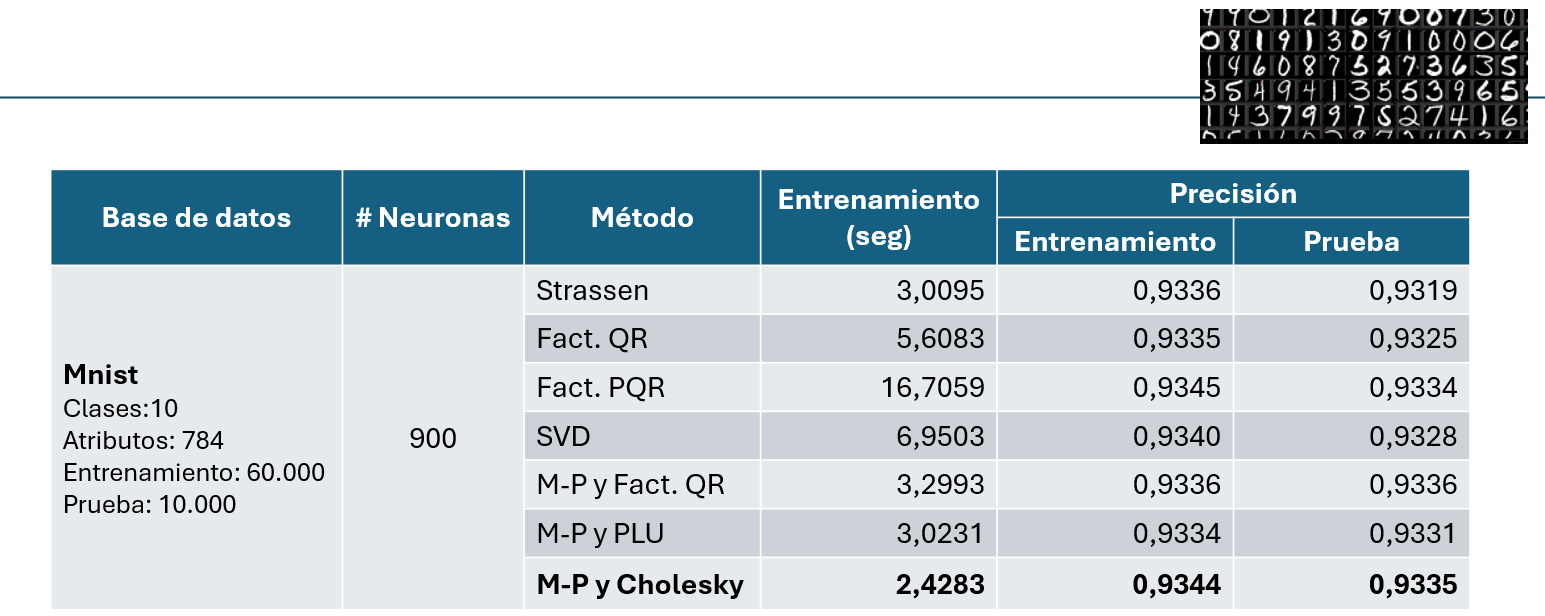



---



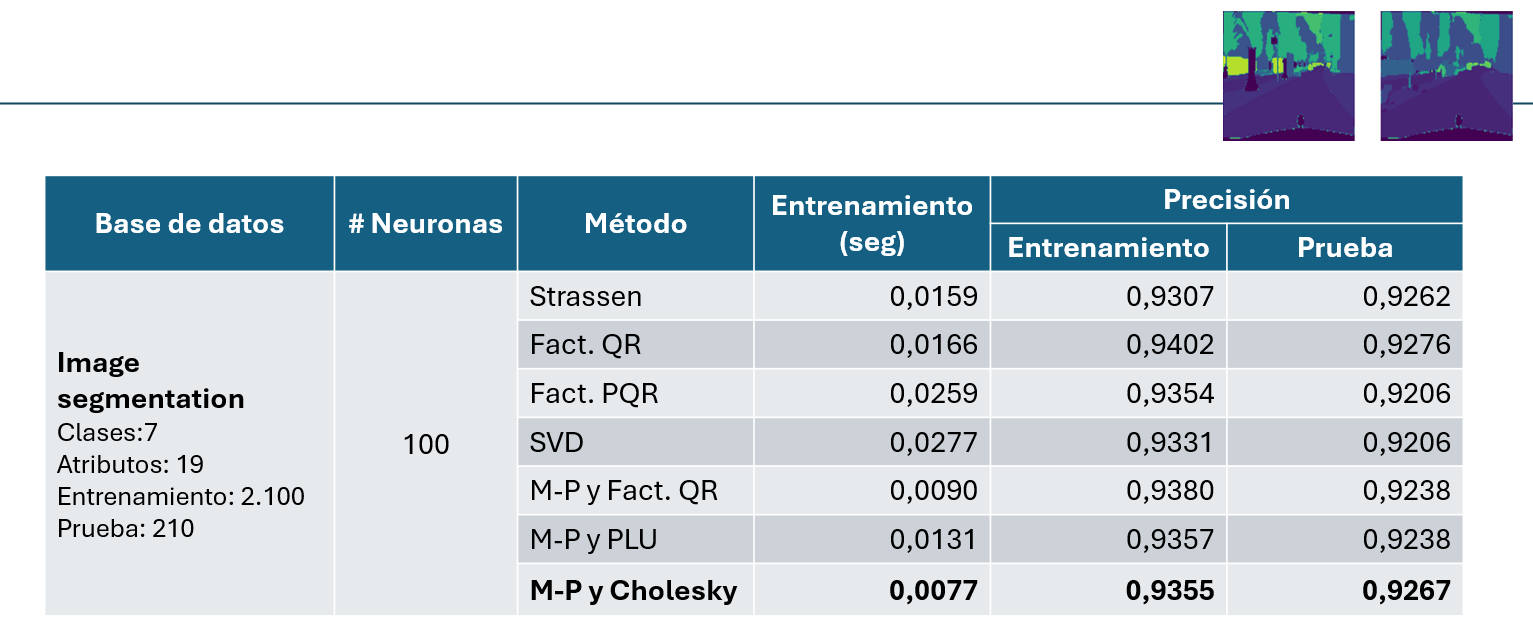



---



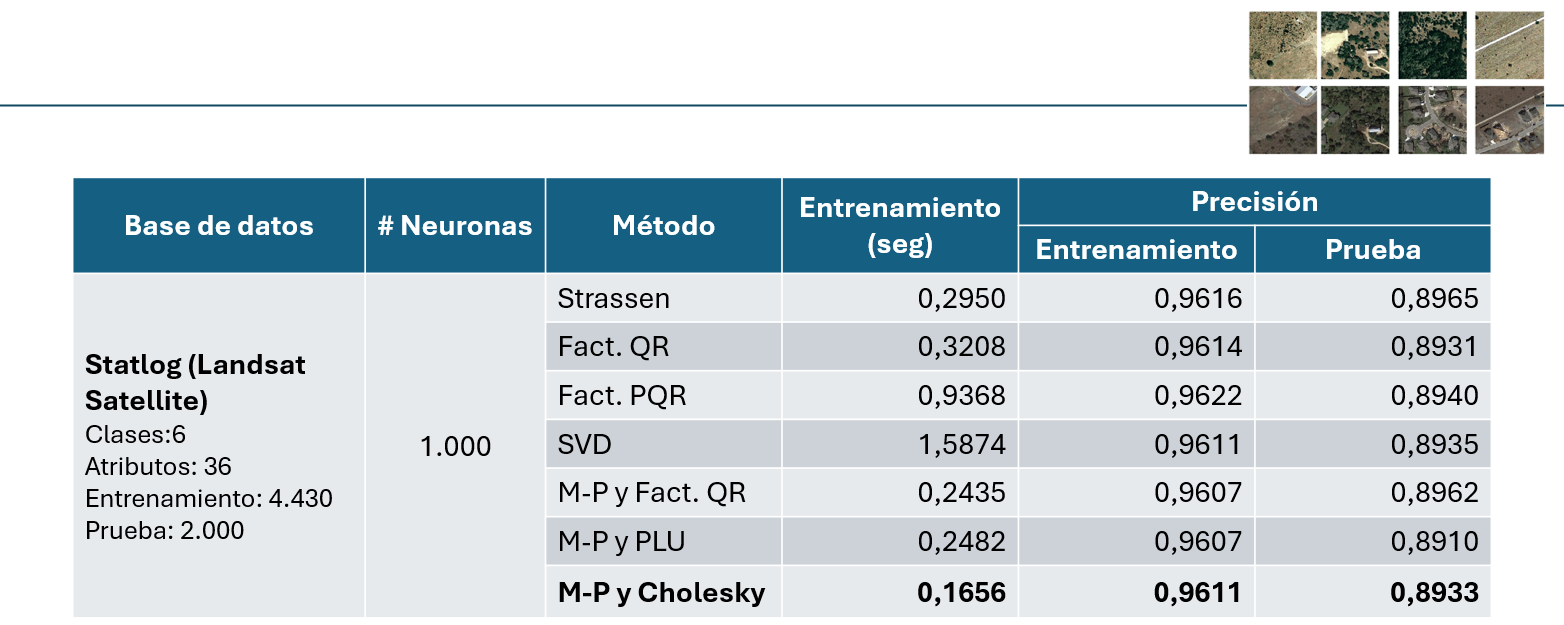



---



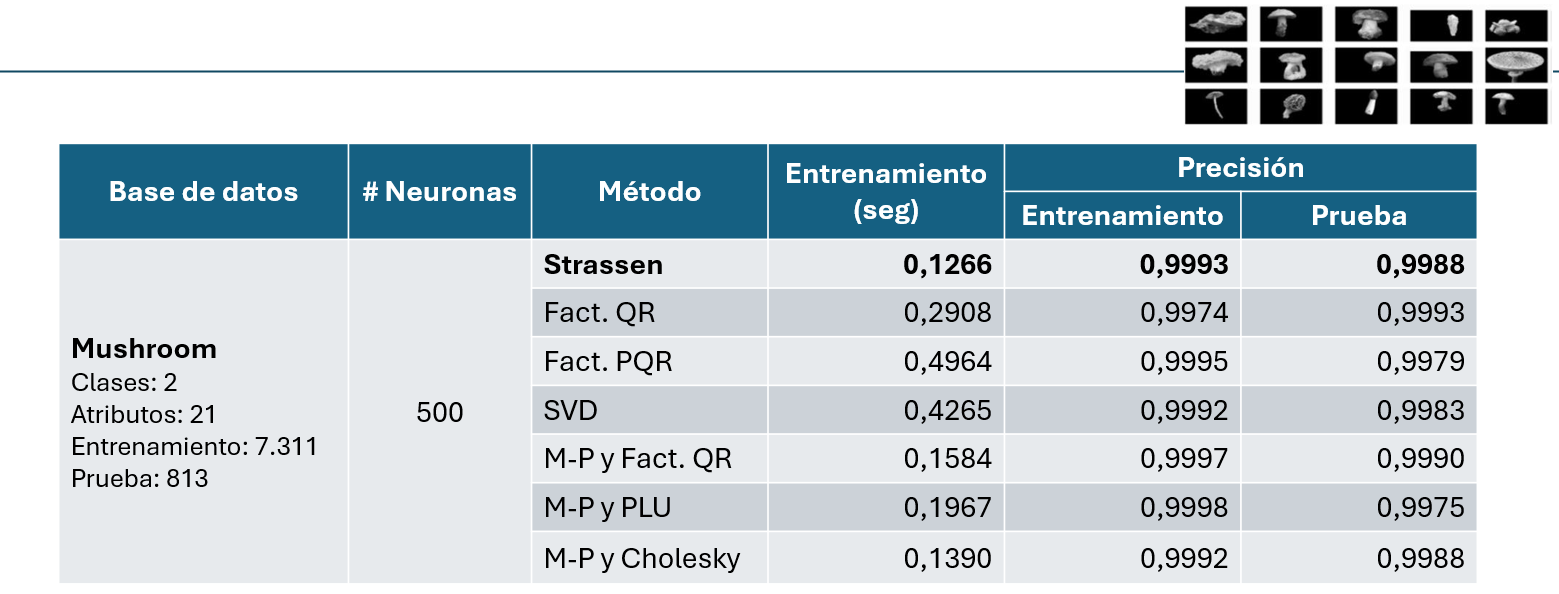



---



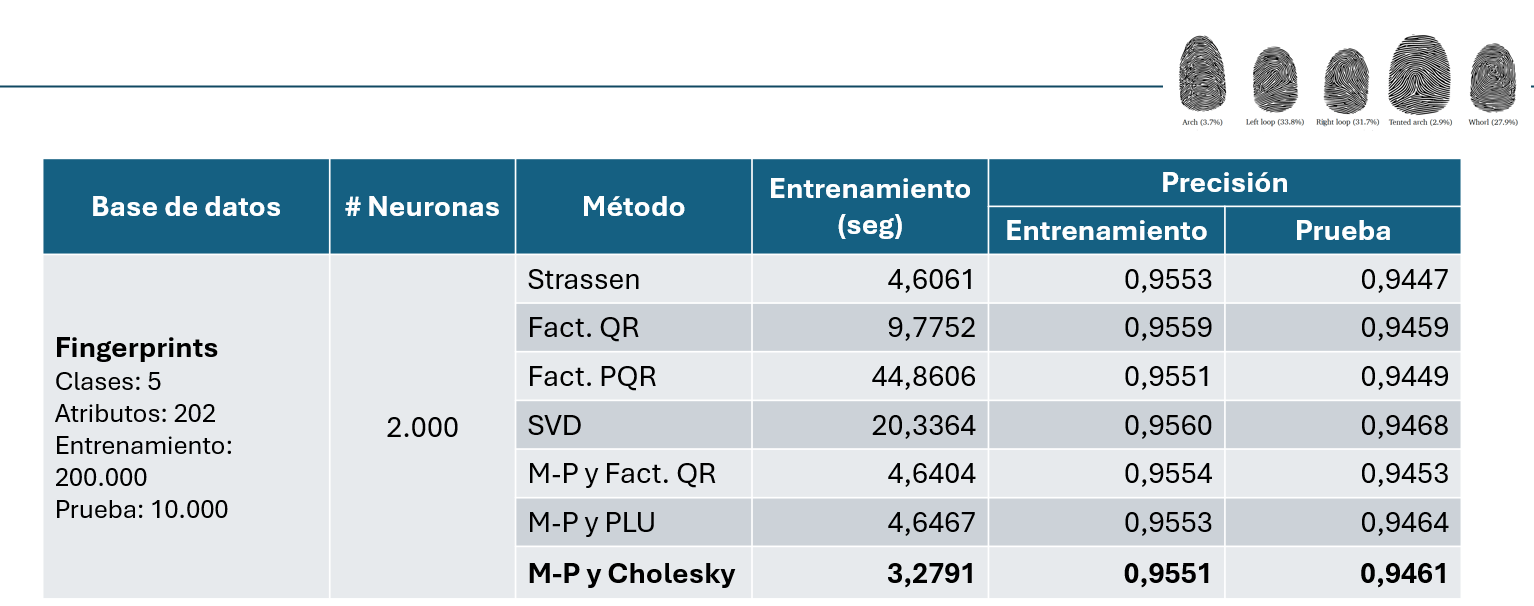



---



# Algunos resultados en un entorno paralelo

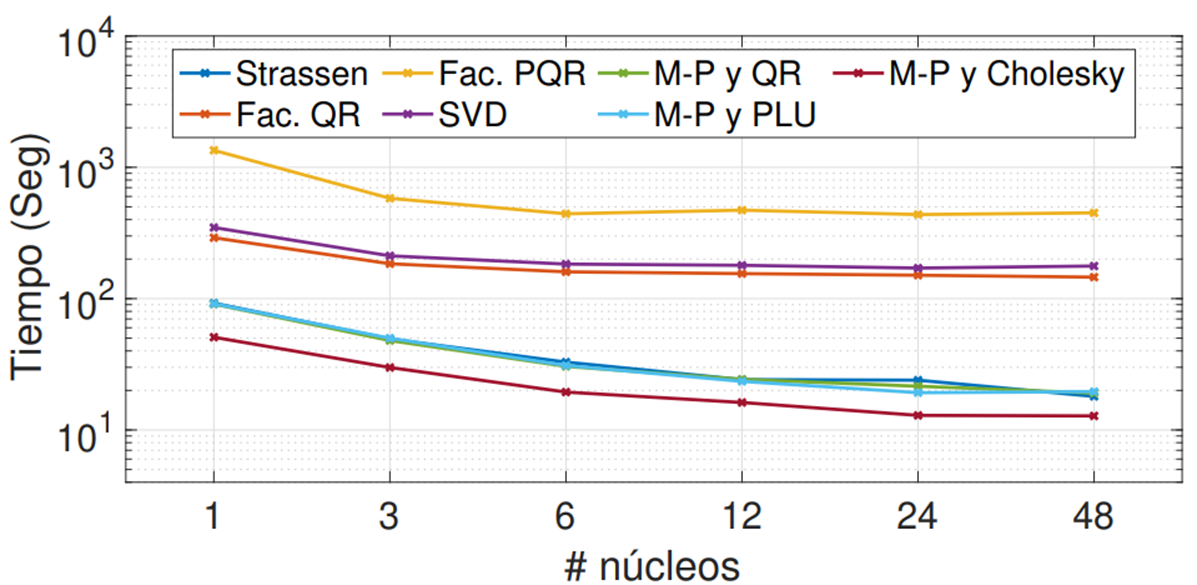

**Figura.** Resultados de la comparación entre el método basado en el algoritmo de Strassen y otros métodos populares, usando Fingerprint dataset con 1.000.000 muestras de entrenamiento.



---



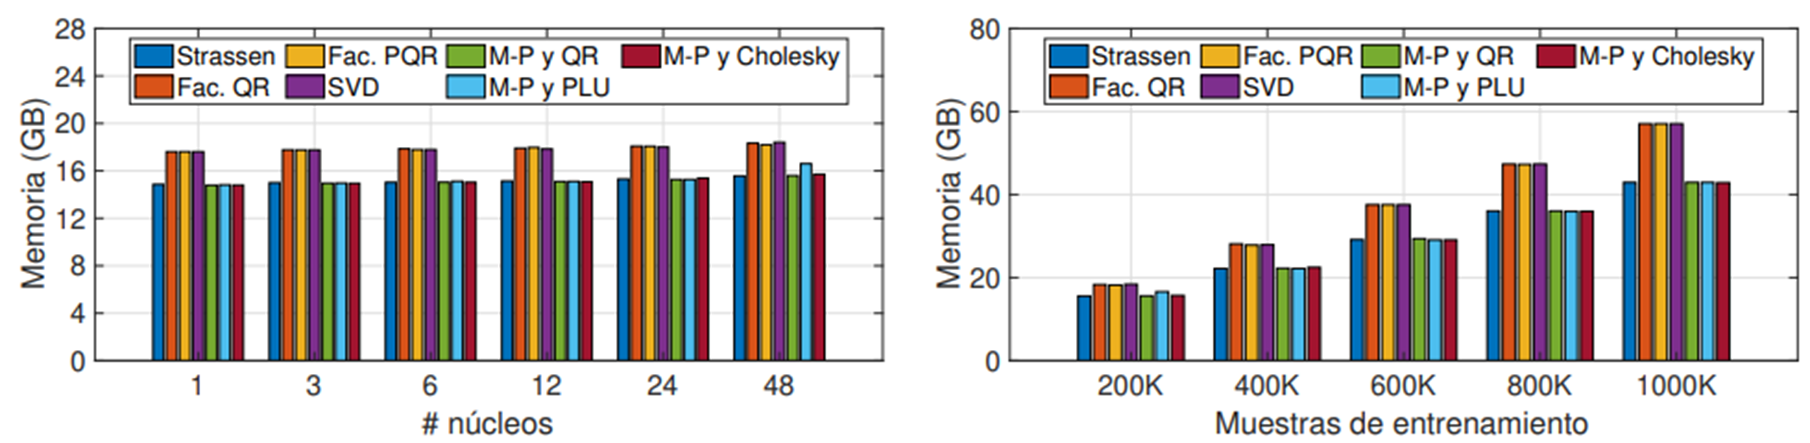

**Figura.** Resultados del consumo de memoria de cada algoritmo en diversos escenarios de entrenamiento. (a) Utilizando la base de datos de huellas dactilares con 200.000 muestras de entrenamiento y variando el número de hilos. (b) Incrementando el número de muestras de entrenamiento con 48 hilos.




---



# Referencias

1.   E. Gelvez-Almeida, R. J. Barrientos, K. Vilches-Ponce, M. Mora, A parallel computing method for the computation of the moore-penrose generalized inverse for shared-memory architectures, IEEE Access 11 (2023) 134834-134845. [doi: https://doi.org/10.1109/ACCESS.2023.3338544](https://doi.org/10.1109/ACCESS.2023.3338544)
2.   E. Gelvez-Almeida, M. Mora, R. J. Barrientos, R. Hernández-García, K. Vilches-Ponce, M. Vera, A review on large-scale data processing with parallel and distributed randomized extreme learning machine neural networks, Mathematical and Computational Applications 29 (3) (2024) 40. [doi: https://doi.org/https://doi.org/10.3390/mca29030040\](https://doi.org/https://doi.org/10.3390/mca29030040)
2.   Y.-H. Pao, Y. Takefuji, Functional-link net computing: theory, system architecture, and functionalities, Computer 25 (5) (1992) 7679. [doi: https://doi.org/https://doi.org/10.1109/2.144401](https://doi.org/https://doi.org/10.1109/2.144401)
3.   Y.-H. Pao, G.-H. Park, D. J. Sobajic, Learning and generalization characteristics of the random vector functional-link net, Neurocomputing 6 (1994) 163-180. [doi: https://doi.org/https://doi.org/10.1016/0925-2312(94)90053-1](https://doi.org/https://doi.org/10.1016/0925-2312(94)90053-1)
4.   L. Zhang, P. N. Suganthan, A survey of randomized algorithms for training neural networks, Information Sciences 364 (2016) 146-155. [doi: https://doi.org/https://doi.org/10.1016/j.ins.2016.01.039](https://doi.org/https://doi.org/10.1016/j.ins.2016.01.039)